In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('H:/UniAcco/Data_Science_Internship - Dump.csv')
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


## Data Cleaning

In [3]:
df = df.drop(['movein','source','lead_id','des_country','des_city','utm_medium','utm_source','source_country','source_city','Unnamed: 0', "Agent_id"],axis=1)
df.head()

,status,lost_reason,budget,lease,room_type
0,LOST,Not responding,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,0-0,0,NaN
4,LOST,Junk lead,NaN,NaN,NaN


In [4]:
df.shape

(46608, 5)

In [5]:
df = df[df.groupby('lease')['lease'].transform('count') > 500]
df.head()

,status,lost_reason,budget,lease,room_type
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,0-0,0,NaN
6,LOST,Short stay,0-0,0,NaN
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,Entire Place
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN


In [6]:
df.status.value_counts().to_dict()

{'LOST': 37414,
 'WON': 2689,
 'OPPORTUNITY': 238,
 'CONTACTED': 27,
 'PROCESSING': 8,
 'IMPORTANT': 1}

In [7]:
df.shape

(40377, 5)

In [8]:
df = df[df['status'].isin(['LOST', 'WON'])]
df.shape

(40103, 5)

In [9]:
df.lease.value_counts().to_dict()

{'Full Year Course Stay 40 - 44 weeks': 11000,
 '0': 7538,
 'Complete Education Year Stay 50 - 52 weeks': 6451,
 '51': 3952,
 'Semester Stay 20 - 24 weeks': 2753,
 'Summer/Short Stay 8 - 12 weeks': 2248,
 'lease': 1644,
 'full-course-stay': 1217,
 'full-year-stay': 956,
 'Other': 932,
 '44': 840,
 '51 weeks': 572}

In [10]:
df.budget.value_counts().to_dict()

{'£60 - £120 Per week': 9619,
 '£121 - £180 Per Week': 8815,
 '0-0': 5418,
 '£181 - £240 Per Week': 2124,
 '100': 982,
 '150': 946,
 '£241 - £300 Per week': 699,
 '> 300£ Per Week': 684,
 '200': 537,
 '120': 425,
 '160': 335,
 '180': 318,
 '130': 313,
 '140': 295,
 '110': 283,
 '500': 269,
 '250': 257,
 '170': 245,
 '300': 240,
 '190': 201,
 '0-100': 184,
 '220': 119,
 '60': 105,
 '80': 103,
 '0-150': 97,
 '230': 88,
 '210': 79,
 '90': 78,
 '450': 72,
 '0-120': 71,
 '350': 67,
 '280': 65,
 '70': 61,
 '0-130': 61,
 '0-200': 59,
 '240': 57,
 '260': 56,
 '0-140': 54,
 '165': 54,
 '400': 53,
 '125': 52,
 '135': 51,
 '0-110': 51,
 '155': 42,
 '199': 42,
 '99': 42,
 '129': 41,
 '145': 41,
 '169': 40,
 '175': 37,
 '270': 37,
 '159': 36,
 '179': 35,
 '0-160': 35,
 '195': 34,
 '185': 34,
 '215': 34,
 '189': 33,
 '105': 32,
 '0-170': 29,
 '162': 27,
 '320': 25,
 '0-180': 25,
 '0-250': 24,
 '245': 24,
 '290': 24,
 '139': 24,
 '109': 23,
 '89': 22,
 '174': 22,
 '193': 21,
 '273': 21,
 '225': 20,
 

In [11]:
df = df[df.groupby('budget')['budget'].transform('count') > 10]
df.shape

(36447, 5)

In [12]:
df.status.value_counts().to_dict()

{'LOST': 34015, 'WON': 2432}

In [13]:
df.room_type.value_counts().to_dict()

{'Ensuite': 11953,
 'Studio': 6097,
 'Entire Place': 4013,
 'Non-Ensuite': 2,
 'Twin-Studio': 1}

In [14]:
df.lost_reason.value_counts().to_dict()

{'Not responding': 6657,
 'Low availability': 6547,
 'Not interested': 5302,
 'Low budget': 4195,
 'Wants private accommodation': 2203,
 'Short stay': 1667,
 'Just Enquiring': 1051,
 'Not a student': 1013,
 'Inadequate details': 708,
 'Semester stay': 664,
 'Booked with manager': 564,
 'Booked on campus accommodation': 533,
 'Junk lead': 499,
 'Supply issue': 443,
 'No supply': 357,
 'Repeat lead': 306,
 'Booked with competitor': 291,
 'Not going to university': 284,
 'Not serving in that region': 219,
 'Distance issue': 167,
 'Junk lead/ Just Enquiring': 137,
 'Lead issue': 115,
 'Looking for admission': 31,
 "Didn't respond in time": 29,
 'Visa/admission denied': 13,
 'Guarantor issue': 9,
 'Looking for Scholarship': 5,
 'Underage student': 3,
 'Looking for loan': 2,
 'Cross sell': 1}

In [15]:
df.status.value_counts().to_dict()

{'LOST': 34015, 'WON': 2432}

In [16]:
df.budget.value_counts().to_dict()

{'£60 - £120 Per week': 9619,
 '£121 - £180 Per Week': 8815,
 '0-0': 5418,
 '£181 - £240 Per Week': 2124,
 '100': 982,
 '150': 946,
 '£241 - £300 Per week': 699,
 '> 300£ Per Week': 684,
 '200': 537,
 '120': 425,
 '160': 335,
 '180': 318,
 '130': 313,
 '140': 295,
 '110': 283,
 '500': 269,
 '250': 257,
 '170': 245,
 '300': 240,
 '190': 201,
 '0-100': 184,
 '220': 119,
 '60': 105,
 '80': 103,
 '0-150': 97,
 '230': 88,
 '210': 79,
 '90': 78,
 '450': 72,
 '0-120': 71,
 '350': 67,
 '280': 65,
 '0-130': 61,
 '70': 61,
 '0-200': 59,
 '240': 57,
 '260': 56,
 '0-140': 54,
 '165': 54,
 '400': 53,
 '125': 52,
 '135': 51,
 '0-110': 51,
 '99': 42,
 '155': 42,
 '199': 42,
 '129': 41,
 '145': 41,
 '169': 40,
 '175': 37,
 '270': 37,
 '159': 36,
 '0-160': 35,
 '179': 35,
 '185': 34,
 '215': 34,
 '195': 34,
 '189': 33,
 '105': 32,
 '0-170': 29,
 '162': 27,
 '320': 25,
 '0-180': 25,
 '139': 24,
 '245': 24,
 '0-250': 24,
 '290': 24,
 '109': 23,
 '89': 22,
 '174': 22,
 '273': 21,
 '193': 21,
 '119': 20,
 

In [17]:
df.isnull().sum()

status             0
lost_reason     2432
budget             0
lease              0
room_type      14381
dtype: int64

In [18]:
df['budget'].astype(str)

2        £121 - £180 Per Week
3                         0-0
6                         0-0
7        £181 - £240 Per Week
8                         100
                 ...         
46602    £121 - £180 Per Week
46603     £60 - £120 Per week
46604     £60 - £120 Per week
46605    £241 - £300 Per week
46607    £181 - £240 Per Week
Name: budget, Length: 36447, dtype: object

In [19]:
df['budget'] = df['budget'].replace(['0-100','0-0','0-150','0-120','0-130','0-200','0-140','0-110','0-160','0-170','0-180','0-250','0-£100','£150 Per Week','250/week','0-190','0-300','200/week','100/week','150/week'],
                                    ['100','10','150','120','130','200','140','110','160','170','180','250','100','150','250','190','300','200','100','150'])
df.head(100)

,status,lost_reason,budget,lease,room_type
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,10,0,NaN
6,LOST,Short stay,10,0,NaN
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,Entire Place
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN
...,...,...,...,...,...
162,LOST,Not interested,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,Studio
163,LOST,Short stay,£121 - £180 Per Week,Semester Stay 20 - 24 weeks,Studio
164,LOST,Not responding,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,Studio
165,LOST,Just Enquiring,150,full-course-stay,NaN


In [20]:
df.budget.value_counts().to_dict()

{'£60 - £120 Per week': 9619,
 '£121 - £180 Per Week': 8815,
 '10': 5418,
 '£181 - £240 Per Week': 2124,
 '100': 1194,
 '150': 1075,
 '£241 - £300 Per week': 699,
 '> 300£ Per Week': 684,
 '200': 612,
 '120': 496,
 '130': 374,
 '160': 370,
 '140': 349,
 '180': 343,
 '110': 334,
 '250': 294,
 '170': 274,
 '500': 269,
 '300': 256,
 '190': 216,
 '220': 119,
 '60': 105,
 '80': 103,
 '230': 88,
 '210': 79,
 '90': 78,
 '450': 72,
 '350': 67,
 '280': 65,
 '70': 61,
 '240': 57,
 '260': 56,
 '165': 54,
 '400': 53,
 '125': 52,
 '135': 51,
 '99': 42,
 '155': 42,
 '199': 42,
 '145': 41,
 '129': 41,
 '169': 40,
 '270': 37,
 '175': 37,
 '159': 36,
 '179': 35,
 '215': 34,
 '185': 34,
 '195': 34,
 '189': 33,
 '105': 32,
 '162': 27,
 '320': 25,
 '139': 24,
 '290': 24,
 '245': 24,
 '109': 23,
 '174': 22,
 '89': 22,
 '273': 21,
 '193': 21,
 '225': 20,
 '119': 20,
 '143': 19,
 '154': 19,
 '205': 19,
 '115': 19,
 '132': 19,
 '164': 18,
 '198': 18,
 '213': 18,
 '330': 17,
 '249': 17,
 '226': 17,
 '192': 17,

In [21]:
import re
bins = [0, 60, 120, 180, 240, 300, float('inf')]
labels = ['below_60/week', '60-120/week', '121-180/week', '181-240/week', '241-300/week', 'above_300/week']

# Define a function to convert the values to per week
def convert_to_weekly(x):
    if '£60 - £120 Per week' in x:
        return float(80)
    elif '£121 - £180 Per Week' in x:
        return float(140)
    elif '0-0' in x:
        return float(10)
    elif '£181 - £240 Per Week' in x:
        return float(200)
    elif '£241 - £300 Per week' in x:
        return float(280)
    elif '> 300£ Per Week' in x:
        return float(330)
    elif re.findall(r'\d+',x):
        return float(x)
    else:
        x = float(x)
        
# Apply the function to the column and create a new column with the converted values
df['budget_numeric'] = df['budget'].apply(convert_to_weekly)

# Use pd.cut to bin the values into the specified categories
df['budget_category'] = pd.cut(df['budget_numeric'], bins=bins, labels=labels)

# Print the resulting dataframe
df.head(50)

,status,lost_reason,budget,lease,room_type,budget_numeric,budget_category
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite,140.0,121-180/week
3,LOST,Low budget,10,0,NaN,10.0,below_60/week
6,LOST,Short stay,10,0,NaN,10.0,below_60/week
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,Entire Place,200.0,181-240/week
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN,100.0,60-120/week
9,LOST,Booked with manager,270,51,NaN,270.0,241-300/week
11,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite,140.0,121-180/week
12,LOST,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Entire Place,140.0,121-180/week
13,LOST,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,Entire Place,200.0,181-240/week
14,LOST,Low budget,100,full-course-stay,NaN,100.0,60-120/week


In [22]:
df['budget_category'] = df['budget_category'].fillna('below_60/week')
df.head(100)

,status,lost_reason,budget,lease,room_type,budget_numeric,budget_category
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite,140.0,121-180/week
3,LOST,Low budget,10,0,NaN,10.0,below_60/week
6,LOST,Short stay,10,0,NaN,10.0,below_60/week
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,Entire Place,200.0,181-240/week
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN,100.0,60-120/week
...,...,...,...,...,...,...,...
162,LOST,Not interested,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,Studio,80.0,60-120/week
163,LOST,Short stay,£121 - £180 Per Week,Semester Stay 20 - 24 weeks,Studio,140.0,121-180/week
164,LOST,Not responding,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,Studio,140.0,121-180/week
165,LOST,Just Enquiring,150,full-course-stay,NaN,150.0,121-180/week


In [23]:
df.budget_category.value_counts().to_dict()

{'121-180/week': 12331,
 '60-120/week': 12091,
 'below_60/week': 5523,
 '181-240/week': 3751,
 '241-300/week': 1526,
 'above_300/week': 1225}

In [24]:
df['budget_category'].isna().sum()

0

In [25]:
lost_reason_categories = df['lost_reason'].dropna().unique()
print(len(lost_reason_categories))

30


In [26]:
df['lost_reason'] = df['lost_reason'].fillna(pd.Series(np.random.choice(lost_reason_categories, size=len(df.index))))
df['lost_reason'].isna().sum()

566

In [27]:
df.isnull().sum()

status                 0
lost_reason          566
budget                 0
lease                  0
room_type          14381
budget_numeric         0
budget_category        0
dtype: int64

In [28]:
most_frequent_value = df['lost_reason'].mode()[0]
df['lost_reason'] = df['lost_reason'].fillna(most_frequent_value)
df.isnull().sum()

status                 0
lost_reason            0
budget                 0
lease                  0
room_type          14381
budget_numeric         0
budget_category        0
dtype: int64

In [29]:
room_type_categories = df['room_type'].dropna().unique()
print(len(lost_reason_categories))
print(lost_reason_categories)

30
['Not responding' 'Low budget' 'Short stay' 'Wants private accommodation'
 'Booked with manager' 'Low availability' 'Junk lead' 'Not interested'
 'Just Enquiring' 'Distance issue' 'Not a student' 'Semester stay'
 'Supply issue' 'Booked with competitor' 'Inadequate details'
 'Junk lead/ Just Enquiring' 'Not going to university' 'Lead issue'
 'Repeat lead' 'Not serving in that region'
 'Booked on campus accommodation' 'No supply' 'Looking for admission'
 'Underage student' 'Guarantor issue' "Didn't respond in time"
 'Visa/admission denied' 'Looking for Scholarship' 'Looking for loan'
 'Cross sell']


In [30]:
df['room_type'] = df['room_type'].fillna(pd.Series(np.random.choice(room_type_categories, size=len(df.index))))
df['room_type'].isna().sum()

3419

In [31]:
most_frequent_value = df['room_type'].mode()[0]
df['room_type'] = df['room_type'].fillna(most_frequent_value)
df.isnull().sum()

status             0
lost_reason        0
budget             0
lease              0
room_type          0
budget_numeric     0
budget_category    0
dtype: int64

In [32]:
df.shape

(36447, 7)

In [33]:
df.head()

,status,lost_reason,budget,lease,room_type,budget_numeric,budget_category
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite,140.0,121-180/week
3,LOST,Low budget,10,0,Entire Place,10.0,below_60/week
6,LOST,Short stay,10,0,Entire Place,10.0,below_60/week
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,Entire Place,200.0,181-240/week
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,Studio,100.0,60-120/week


In [34]:
df = df.drop(['budget','budget_numeric'], axis=1)
df.head()

,status,lost_reason,lease,room_type,budget_category
2,LOST,Not responding,Full Year Course Stay 40 - 44 weeks,Ensuite,121-180/week
3,LOST,Low budget,0,Entire Place,below_60/week
6,LOST,Short stay,0,Entire Place,below_60/week
7,LOST,Wants private accommodation,51,Entire Place,181-240/week
8,LOST,Low budget,Semester Stay 20 - 24 weeks,Studio,60-120/week


In [35]:
df.lease.value_counts().to_dict()

{'Full Year Course Stay 40 - 44 weeks': 10869,
 'Complete Education Year Stay 50 - 52 weeks': 6363,
 '0': 5390,
 '51': 3192,
 'Semester Stay 20 - 24 weeks': 2734,
 'Summer/Short Stay 8 - 12 weeks': 2236,
 'lease': 1618,
 'full-course-stay': 1202,
 'full-year-stay': 949,
 'Other': 929,
 '44': 678,
 '51 weeks': 287}

In [36]:
df['lease'] = df['lease'].replace(['51','51 weeks','0','lease','full-course-stay','full-year-stay','Other','44'],
                                  ['Complete Education Year Stay 50 - 52 weeks','Complete Education Year Stay 50 - 52 weeks','Less than 8 weeks','Complete Education Year Stay 50 - 52 weeks','Full Year Course Stay 40 - 44 weeks','Complete Education Year Stay 50 - 52 weeks','Other','Full Year Course Stay 40 - 44 weeks'])

In [37]:
df.lease.value_counts().to_dict()

{'Full Year Course Stay 40 - 44 weeks': 12749,
 'Complete Education Year Stay 50 - 52 weeks': 12409,
 'Less than 8 weeks': 5390,
 'Semester Stay 20 - 24 weeks': 2734,
 'Summer/Short Stay 8 - 12 weeks': 2236,
 'Other': 929}

In [38]:
df['lease'] = df['lease'].replace(['Year Stay 50-52 weeks','Year Stay 50-52 week','Course Stay 40-44 weeks'],
                                  ["Complete Education Year Stay 50 - 52 weeks","Complete Education Year Stay 50 - 52 weeks","Full Year Course Stay 40 - 44 weeks"])

In [39]:
df.lease.value_counts().to_dict()

{'Full Year Course Stay 40 - 44 weeks': 12749,
 'Complete Education Year Stay 50 - 52 weeks': 12409,
 'Less than 8 weeks': 5390,
 'Semester Stay 20 - 24 weeks': 2734,
 'Summer/Short Stay 8 - 12 weeks': 2236,
 'Other': 929}

In [40]:
df.isna().sum()

status             0
lost_reason        0
lease              0
room_type          0
budget_category    0
dtype: int64

In [41]:
df.head()

,status,lost_reason,lease,room_type,budget_category
2,LOST,Not responding,Full Year Course Stay 40 - 44 weeks,Ensuite,121-180/week
3,LOST,Low budget,Less than 8 weeks,Entire Place,below_60/week
6,LOST,Short stay,Less than 8 weeks,Entire Place,below_60/week
7,LOST,Wants private accommodation,Complete Education Year Stay 50 - 52 weeks,Entire Place,181-240/week
8,LOST,Low budget,Semester Stay 20 - 24 weeks,Studio,60-120/week


In [42]:
df.status.value_counts().to_dict()

{'LOST': 34015, 'WON': 2432}

## EDA

In [43]:
import warnings
warnings.filterwarnings("ignore")

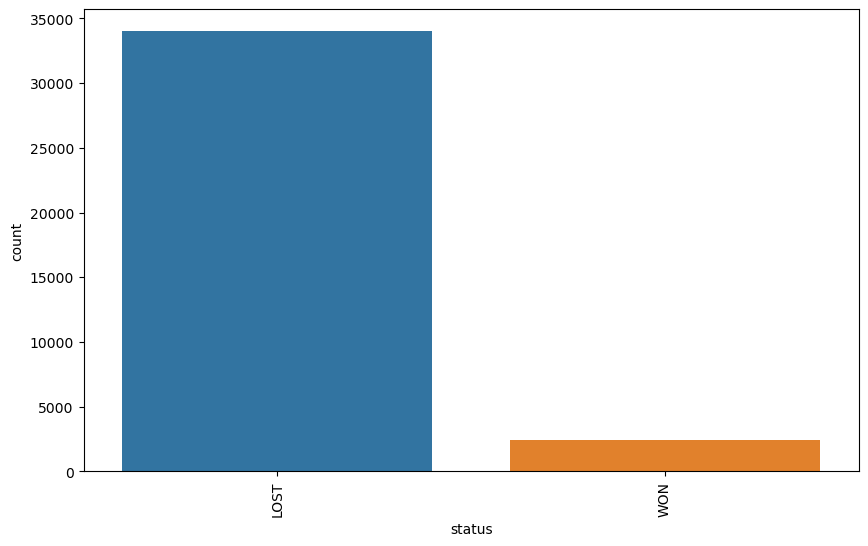

In [44]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(df['status'])
plt.xticks(rotation = 90)
plt.show()

We can see that people have we have more "Lost" leads than "Won"

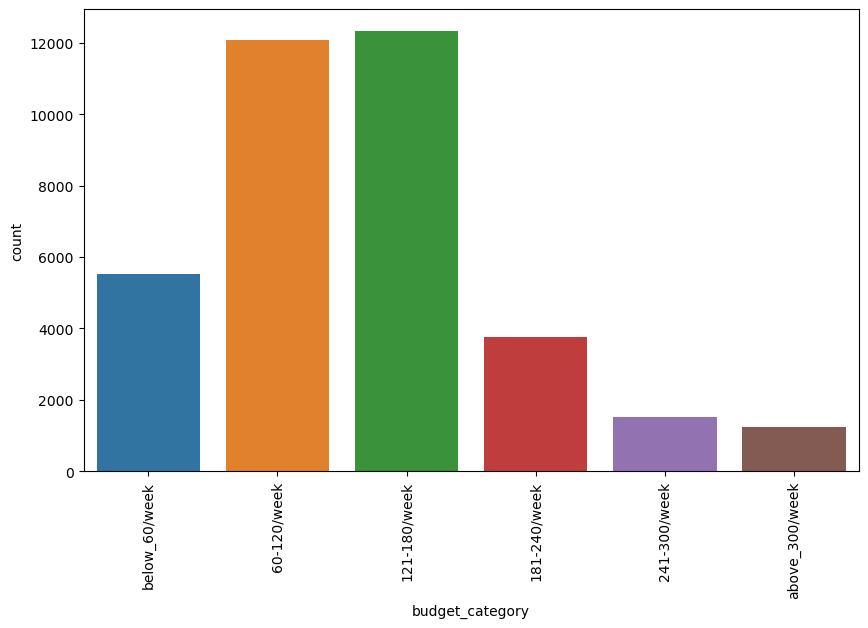

In [45]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(df['budget_category'])
plt.xticks(rotation = 90)
plt.show()

Here we can analyse that the **'60-120/week'** & **'121-180/week'** budget students are **more** than other catagories. Because Obviously they are student and they are tend keep their expenditure as low as possible.

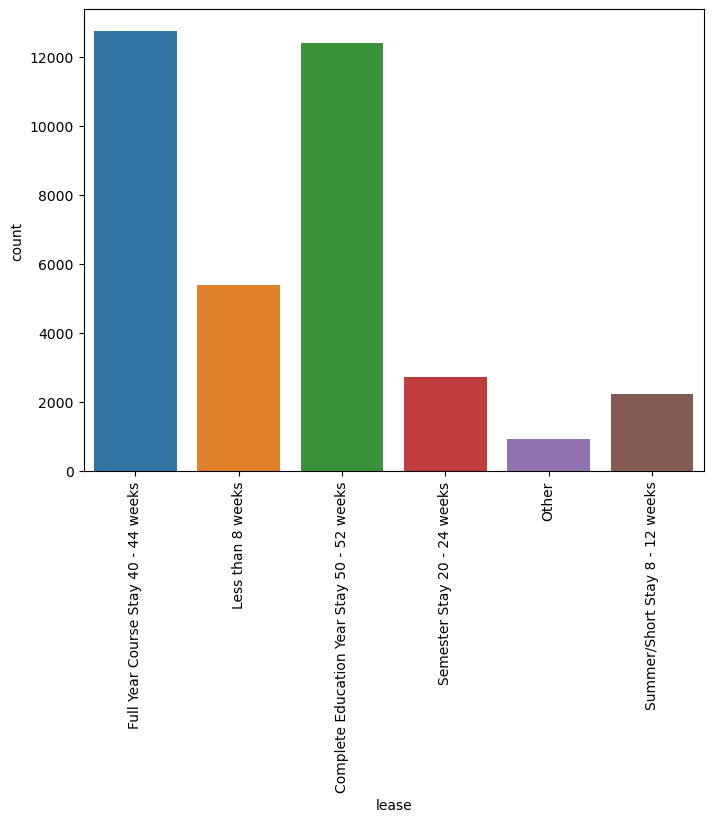

In [46]:
fig, axs = plt.subplots(figsize = (8,6))
sns.countplot(df['lease'])
plt.xticks(rotation = 90)
plt.show()

As they are students the most students wants the lease for a **Year(50-52 weeks)** or **Course Duration(40-44 weeks)**

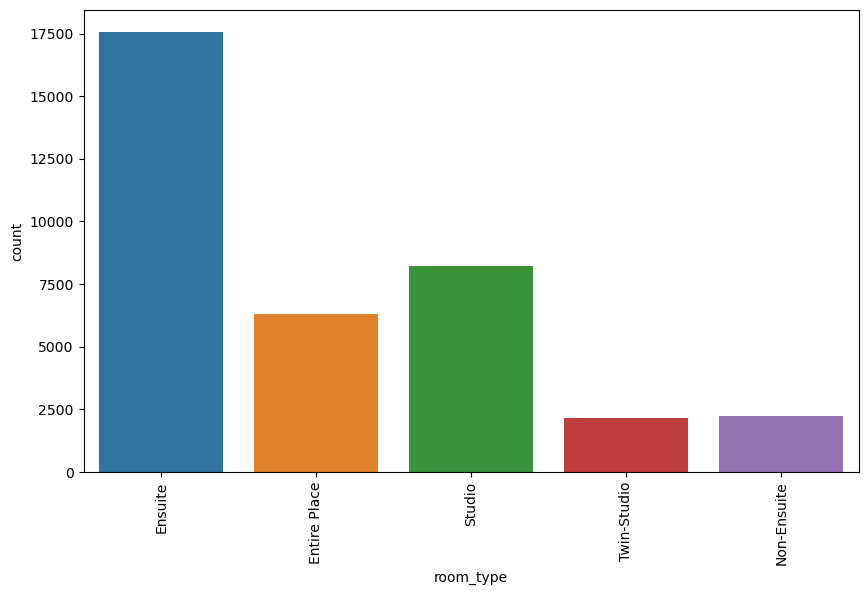

In [47]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(df['room_type'])
plt.xticks(rotation = 90)
plt.show()

Most of the students wants **Ensuite** type of room

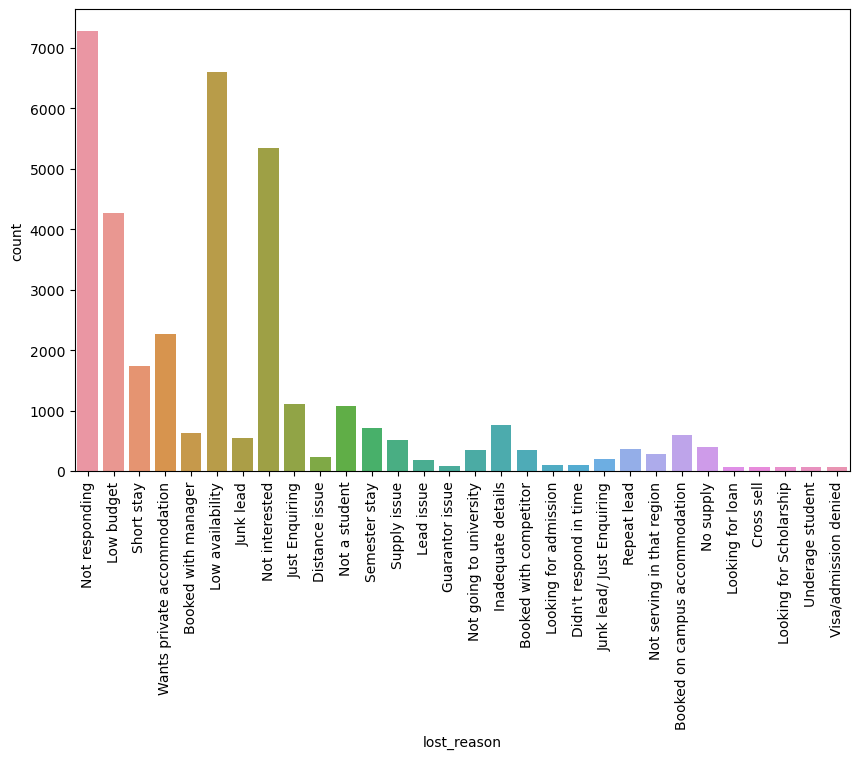

In [48]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(df['lost_reason'])
plt.xticks(rotation = 90)
plt.show()

1. Here we can analyse that Most customer loss is due to 'Not Responding'.
2. 2nd most frequent reason for not getting a customer is "Low availability".
3. Also there are significant count for 'Not Interested' and 'Low Budget'.
4. There is considerable count for "Short Stay" and "Wants Private Accomodation" as well.
5. There is small set customer for "Just Enquiring"

In [49]:
df.describe()

,status,lost_reason,lease,room_type,budget_category
count,36447,36447,36447,36447,36447
unique,2,30,6,5,6
top,LOST,Not responding,Full Year Course Stay 40 - 44 weeks,Ensuite,121-180/week
freq,34015,7281,12749,17562,12331


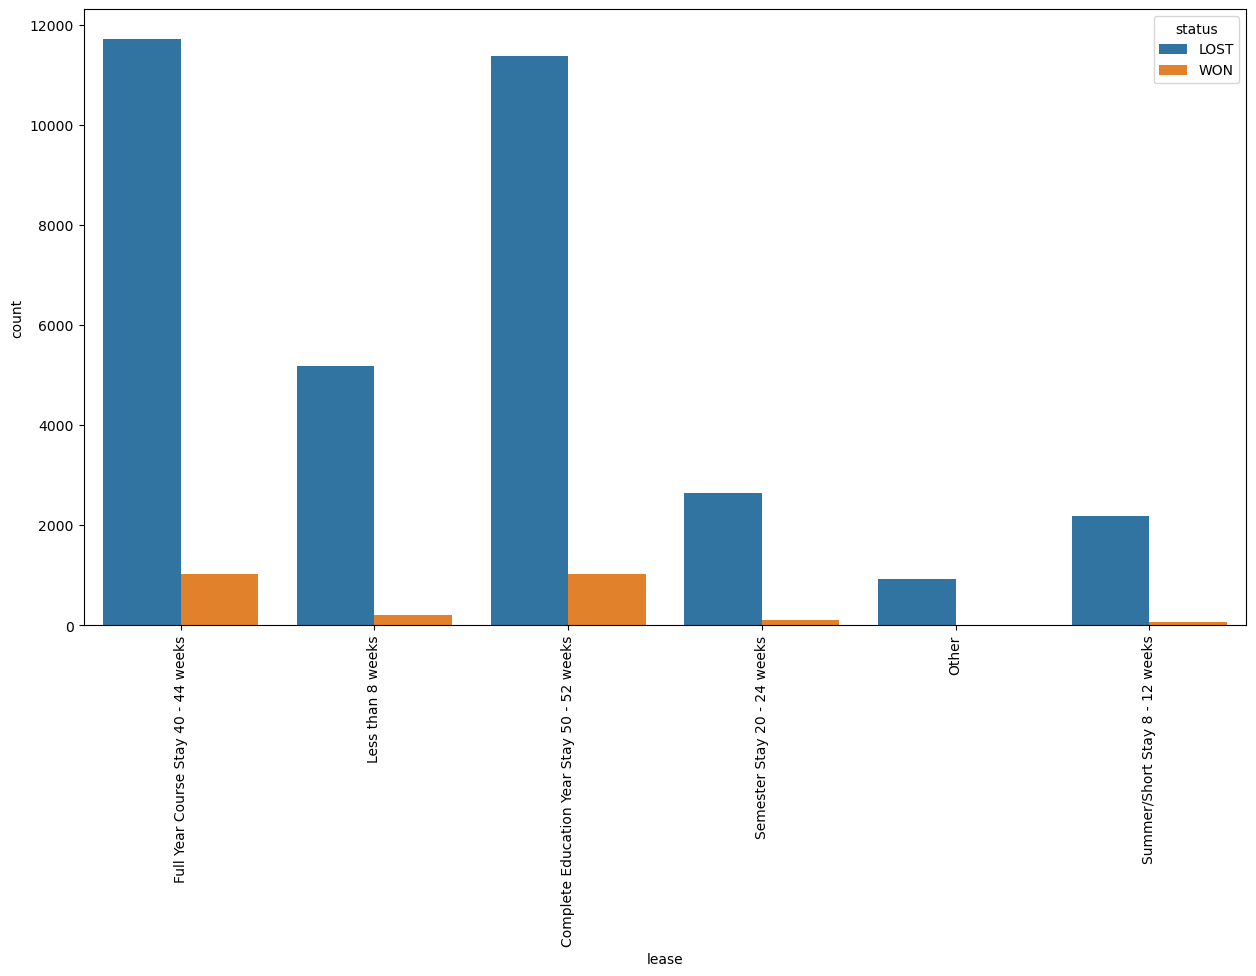

In [50]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='lease', hue='status', data=df)
plt.xticks(rotation=90)
plt.show()

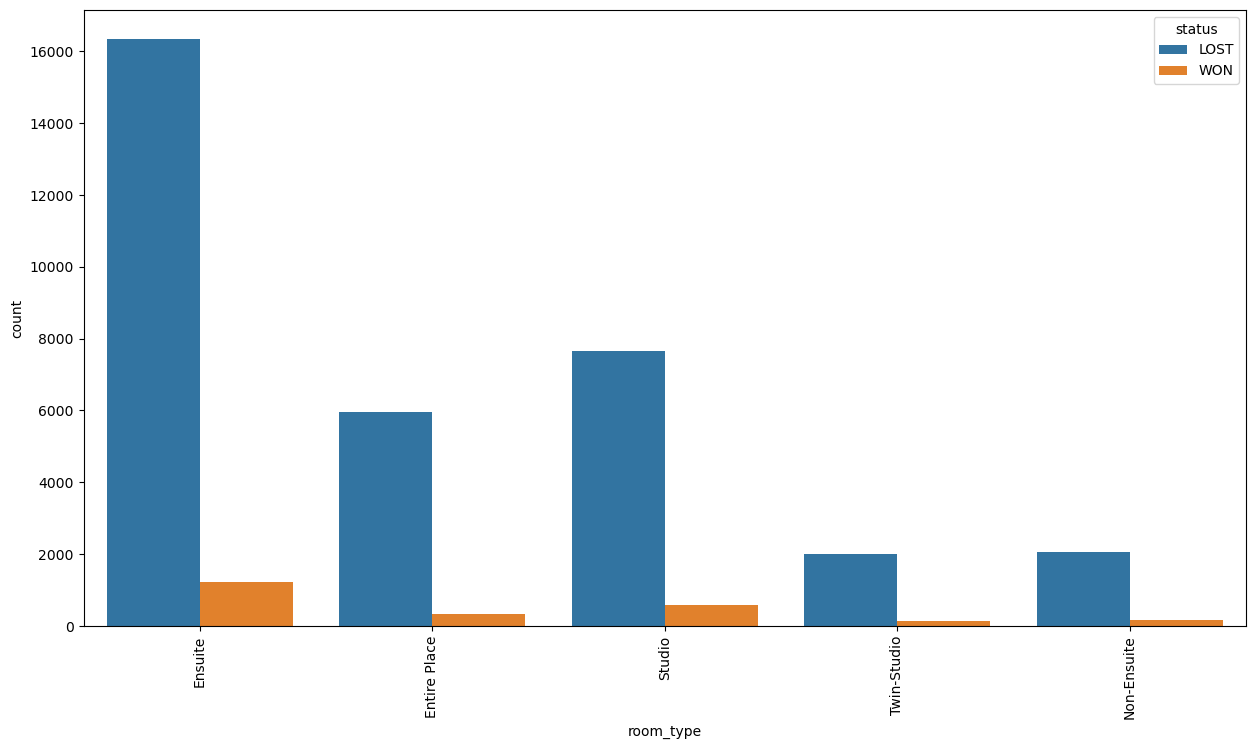

In [51]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='room_type', hue='status', data=df)
plt.xticks(rotation=90)
plt.show()

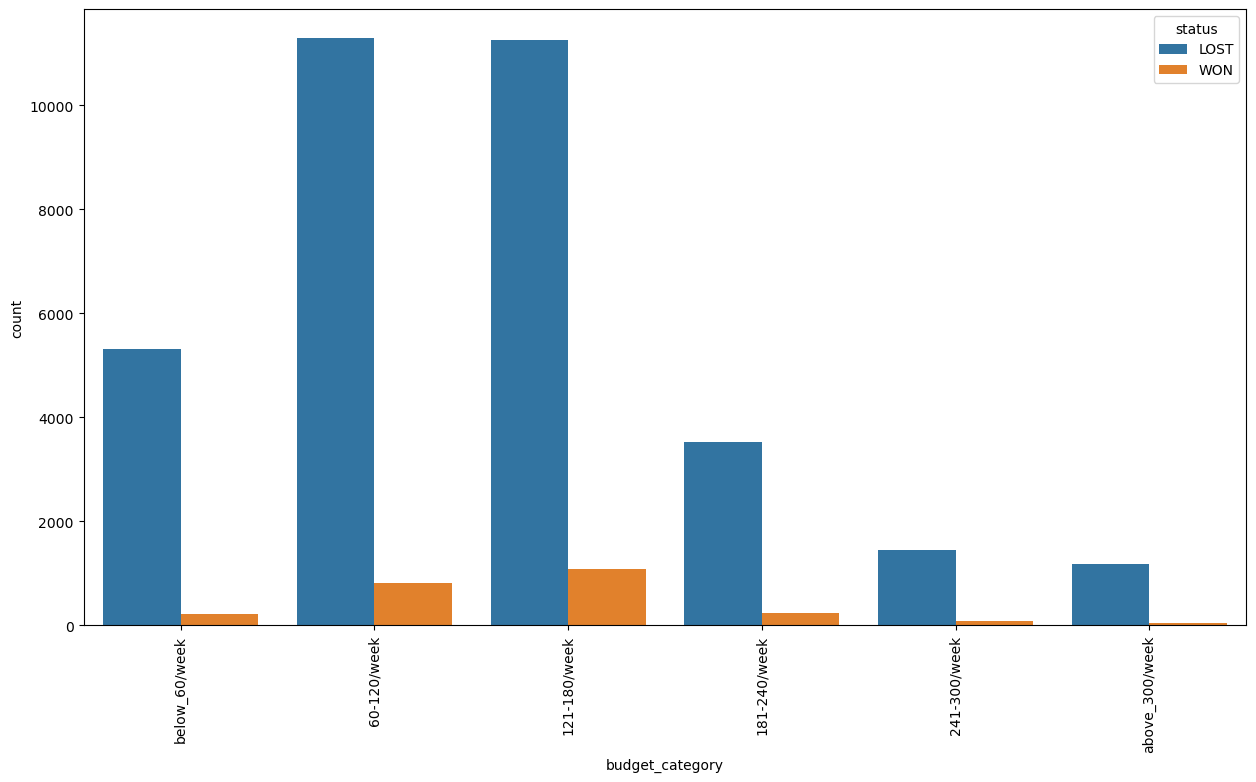

In [52]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='budget_category', hue='status', data=df)
plt.xticks(rotation=90)
plt.show()

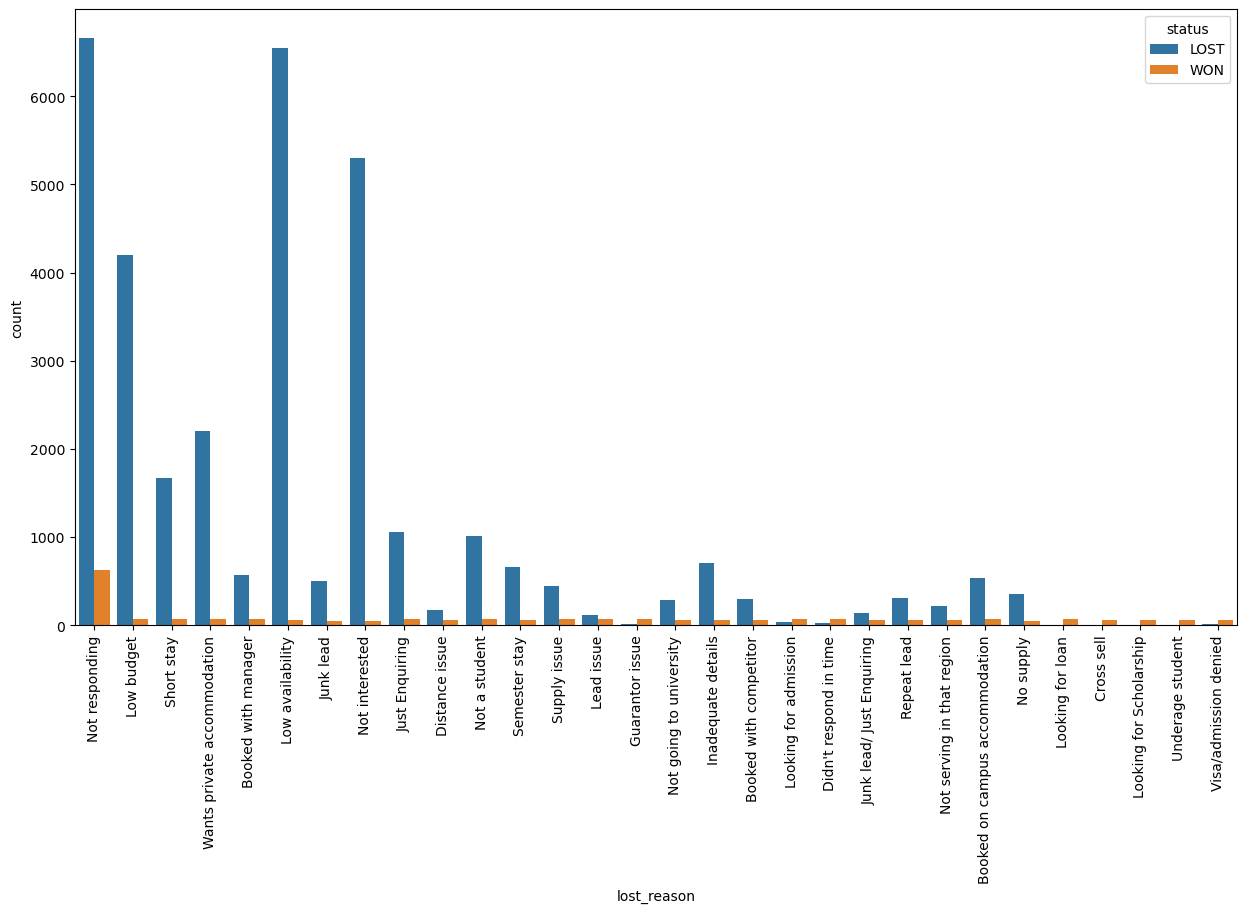

In [53]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='lost_reason', hue='status', data=df)
plt.xticks(rotation=90)
plt.show()

In [54]:
df = pd.get_dummies(data=df, columns=['budget_category', 'room_type','lease','lost_reason'])
df.head()

,status,budget_category_below_60/week,budget_category_60-120/week,budget_category_121-180/week,budget_category_181-240/week,budget_category_241-300/week,budget_category_above_300/week,room_type_Ensuite,room_type_Entire Place,room_type_Non-Ensuite,...,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation
2,LOST,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,LOST,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,LOST,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,LOST,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,LOST,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.status = le.fit_transform(df.status)
df.head()

,status,budget_category_below_60/week,budget_category_60-120/week,budget_category_121-180/week,budget_category_181-240/week,budget_category_241-300/week,budget_category_above_300/week,room_type_Ensuite,room_type_Entire Place,room_type_Non-Ensuite,...,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = df.drop(['status'],axis=1)
y = df['status']

In [57]:
X.astype('float')
y.astype('float')

2        0.0
3        0.0
6        0.0
7        0.0
8        0.0
        ... 
46602    0.0
46603    0.0
46604    0.0
46605    0.0
46607    0.0
Name: status, Length: 36447, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Model Building

In [59]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [60]:
#We first create a model with all the available columns
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                25512
Model:                            GLM   Df Residuals:                    25468
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4669.3
Date:                Tue, 21 Feb 2023   Deviance:                       9338.6
Time:                        23:20:50   Pearson chi2:                 2.71e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1205
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.2734      0.073    -17.337      0.000      -1.417      -1.129
budget_category_below_60/week                       -0.5510      0.232     -2.370      0.018      -1.007      -0.095
budget_category_60-120/week                          0.1230      0.078      1.575      0.115      -0.030       0.276
budget_category_121-180/week                         0.2757      0.076      3.606      0.000       0.126       0.425
budget_category_181-240/week                        -0.0865      0.106     -0.820      0.412      -0.293       0.120
budget_category_241-300/week                        -0.2064      0.151     -1.367      0.172      -0.502       0.090
budget_category_above_300/week                      -0.8282      0.194     -4.267      0.000      -1.209      -0.448
room_type_Ensuite                                   -0.1039      0.053     -1.957      0.050      -0.208       0.000
room_type_Entire Place                              -0.4982      0.076     -6.563      0.000      -0.647      -0.349
room_type_Non-Ensuite                               -0.2013      0.106     -1.899      0.058      -0.409       0.007
room_type_Studio                                    -0.3011      0.064     -4.671      0.000      -0.427      -0.175
room_type_Twin-Studio                               -0.1690      0.110     -1.538      0.124      -0.384       0.046
lease_Complete Education Year Stay 50 - 52 weeks     0.7285      0.095      7.643      0.000       0.542       0.915
lease_Full Year Course Stay 40 - 44 weeks            0.5943      0.097      6.097      0.000       0.403       0.785
lease_Less than 8 weeks                              0.3633      0.242      1.502      0.133      -0.111       0.837
lease_Other                                         -1.4459      0.351     -4.123      0.000      -2.133      -0.759
lease_Semester Stay 20 - 24 weeks                   -0.7410      0.155     -4.787      0.000      -1.044      -0.438
lease_Summer/Short Stay 8 - 12 weeks                -0.7726      0.174     -4.433      0.000      -1.114      -0.431
lost_reason_Booked on campus accommodation          -1.1531      0.166     -6.966      0.000      -1.478      -0.829
lost_reason_Booked with competitor                  -0.5699      0.172     -3.309      0.001      -0.907      -0.232
lost_reason_Booked with manager                     -1.5769      0.185     -8.514      0.000      -1.940      -1.214
lost_reason_Cross sell                               4.7184      0.936      5.041      0.000       2.884       6.553
lost_reason_Didn't respond in time                   1.8422      0.280      6.569      0.000       1.293       2.392
lost_reason_Distance issue               

In [61]:
#Getting the predicted values on the Train Set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:100]

42024    0.181206
35496    0.003793
28287    0.124683
16791    0.921800
37790    0.009876
           ...   
26186    0.079825
19373    0.157226
24589    0.022695
24844    0.022177
8646     0.145748
Length: 100, dtype: float64

## Feature Selection using RFE

Since there are too many columns, we use RFE to choose the top 35 features for an understandable model.

In [62]:
logreg = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('budget_category_below_60/week', True, 1),
 ('budget_category_60-120/week', False, 6),
 ('budget_category_121-180/week', False, 5),
 ('budget_category_181-240/week', False, 8),
 ('budget_category_241-300/week', False, 13),
 ('budget_category_above_300/week', True, 1),
 ('room_type_Ensuite', False, 7),
 ('room_type_Entire Place', False, 2),
 ('room_type_Non-Ensuite', False, 10),
 ('room_type_Studio', False, 12),
 ('room_type_Twin-Studio', False, 9),
 ('lease_Complete Education Year Stay 50 - 52 weeks', True, 1),
 ('lease_Full Year Course Stay 40 - 44 weeks', True, 1),
 ('lease_Less than 8 weeks', True, 1),
 ('lease_Other', True, 1),
 ('lease_Semester Stay 20 - 24 weeks', True, 1),
 ('lease_Summer/Short Stay 8 - 12 weeks', True, 1),
 ('lost_reason_Booked on campus accommodation', True, 1),
 ('lost_reason_Booked with competitor', True, 1),
 ('lost_reason_Booked with manager', True, 1),
 ('lost_reason_Cross sell', True, 1),
 ("lost_reason_Didn't respond in time", True, 1),
 ('lost_reason

In [63]:
#Columns within top 20
col = X_train.columns[rfe.support_]
print(col)

Index(['budget_category_below_60/week', 'budget_category_above_300/week',
       'lease_Complete Education Year Stay 50 - 52 weeks',
       'lease_Full Year Course Stay 40 - 44 weeks', 'lease_Less than 8 weeks',
       'lease_Other', 'lease_Semester Stay 20 - 24 weeks',
       'lease_Summer/Short Stay 8 - 12 weeks',
       'lost_reason_Booked on campus accommodation',
       'lost_reason_Booked with competitor', 'lost_reason_Booked with manager',
       'lost_reason_Cross sell', 'lost_reason_Didn't respond in time',
       'lost_reason_Guarantor issue', 'lost_reason_Inadequate details',
       'lost_reason_Junk lead', 'lost_reason_Just Enquiring',
       'lost_reason_Lead issue', 'lost_reason_Looking for Scholarship',
       'lost_reason_Looking for admission', 'lost_reason_Looking for loan',
       'lost_reason_Low availability', 'lost_reason_Low budget',
       'lost_reason_No supply', 'lost_reason_Not a student',
       'lost_reason_Not going to university', 'lost_reason_Not interes

In [64]:
#Eliminated Columns
print(X_train.columns[~rfe.support_])

Index(['budget_category_60-120/week', 'budget_category_121-180/week',
       'budget_category_181-240/week', 'budget_category_241-300/week',
       'room_type_Ensuite', 'room_type_Entire Place', 'room_type_Non-Ensuite',
       'room_type_Studio', 'room_type_Twin-Studio',
       'lost_reason_Distance issue', 'lost_reason_Junk lead/ Just Enquiring',
       'lost_reason_Not serving in that region'],
      dtype='object')


In [65]:
# Building the second model with feature-selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                25512
Model:                            GLM   Df Residuals:                    25477
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4692.8
Date:                Tue, 21 Feb 2023   Deviance:                       9385.6
Time:                        23:20:55   Pearson chi2:                 2.67e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1189
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.3465      0.119    -11.358      0.000      -1.579      -1.114
budget_category_below_60/week                       -0.6844      0.262     -2.616      0.009      -1.197      -0.172
budget_category_above_300/week                      -0.9853      0.209     -4.722      0.000      -1.394      -0.576
lease_Complete Education Year Stay 50 - 52 weeks     0.6926      0.086      8.048      0.000       0.524       0.861
lease_Full Year Course Stay 40 - 44 weeks            0.6099      0.088      6.962      0.000       0.438       0.782
lease_Less than 8 weeks                              0.3490      0.234      1.491      0.136      -0.110       0.808
lease_Other                                         -1.4904      0.333     -4.475      0.000      -2.143      -0.838
lease_Semester Stay 20 - 24 weeks                   -0.7467      0.146     -5.103      0.000      -1.033      -0.460
lease_Summer/Short Stay 8 - 12 weeks                -0.7609      0.166     -4.583      0.000      -1.086      -0.435
lost_reason_Booked on campus accommodation          -1.0859      0.183     -5.924      0.000      -1.445      -0.727
lost_reason_Booked with competitor                  -0.5346      0.191     -2.798      0.005      -0.909      -0.160
lost_reason_Booked with manager                     -1.5325      0.200     -7.675      0.000      -1.924      -1.141
lost_reason_Cross sell                               4.7714      1.026      4.652      0.000       2.761       6.782
lost_reason_Didn't respond in time                   1.8501      0.306      6.054      0.000       1.251       2.449
lost_reason_Guarantor issue                          3.1262      0.489      6.389      0.000       2.167       4.085
lost_reason_Inadequate details                      -1.3382      0.190     -7.039      0.000      -1.711      -0.966
lost_reason_Junk lead                               -1.4222      0.225     -6.320      0.000      -1.863      -0.981
lost_reason_Just Enquiring                          -1.7792      0.184     -9.653      0.000      -2.140      -1.418
lost_reason_Lead issue                               0.4062      0.216      1.879      0.060      -0.018       0.830
lost_reason_Looking for Scholarship                  3.2170      0.550      5.851      0.000       2.139       4.295
lost_reason_Looking for admission                    2.1710      0.316      6.871      0.000       1.552       2.790
lost_reason_Looking for loan                         4.7493      1.025      4.633      0.000       2.740       6.759
lost_reason_Low availability                        -3.5704      0.181    -19.681      0.000      -3.926      -3.215
lost_reason_Low budget                   

In [66]:
# All the P-Values are below 0.05, which shows that the attributes are significant and plays a part in the prediction
# Now, we check the VIF to chck the correlation amoung the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
27,lost_reason_Not responding,9.42
21,lost_reason_Low availability,8.72
0,budget_category_below_60/week,8.62
26,lost_reason_Not interested,7.51
22,lost_reason_Low budget,6.43
34,lost_reason_Wants private accommodation,4.05
30,lost_reason_Short stay,3.61
16,lost_reason_Just Enquiring,2.55
24,lost_reason_Not a student,2.50
29,lost_reason_Semester stay,2.14


All the features have a VIF of less than 10. Taking 20 as the threshold, all the features can be kept in the model, since they are independent of each other.

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

42024    0.177864
35496    0.003458
28287    0.102839
16791    0.922760
37790    0.009630
40501    0.014423
43994    0.102839
4142     0.438370
1417     0.042638
37022    0.014423
dtype: float64

In [68]:
#Creating a Dataframe with the actual lead conversion and predicted lead conversion
y_train_pred_final = pd.DataFrame({'status':y_train.values, 'status_prob':y_train_pred})
y_train_pred_final.head()

,status,status_prob
42024,0,0.177864
35496,0,0.003458
28287,0,0.102839
16791,1,0.922760
37790,0,0.009630


In [69]:
#Creating a new column, Predicted, with less than/equal 0.5 Converted probability as 0 and higher than 0.5 as 1. Intitially we
#take 0.5 as an arbitrary value just for analysis
y_train_pred_final['predicted_status'] = y_train_pred_final['status'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,status,status_prob,predicted_status
42024,0,0.177864,0
35496,0,0.003458,0
28287,0,0.102839,0
16791,1,0.922760,1
37790,0,0.009630,0
40501,0,0.014423,0
43994,1,0.102839,1
4142,1,0.438370,1
1417,0,0.042638,0
37022,0,0.014423,0


In [70]:
y_train_pred_final['status_prob'] = y_train_pred_final['status_prob'].apply(lambda x: x*100)
y_train_pred_final.head()

,status,status_prob,predicted_status
42024,0,17.786389,0
35496,0,0.345784,0
28287,0,10.283877,0
16791,1,92.276041,1
37790,0,0.962955,0


In [71]:
y_train_pred_final['lead_score'] = y_train_pred_final['status_prob'].apply(lambda x: int(x))
y_train_pred_final.head()

,status,status_prob,predicted_status,lead_score
42024,0,17.786389,0,17
35496,0,0.345784,0,0
28287,0,10.283877,0,10
16791,1,92.276041,1,92
37790,0,0.962955,0,0


In [72]:
#Evaluating the model
#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['status'], y_train_pred_final['predicted_status'] )
print(confusion)

[[23789     0]
 [    0  1723]]


In [73]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['status'], y_train_pred_final['predicted_status']))

1.0


In [74]:
print("Precision : ",precision_score(y_train_pred_final['status'], y_train_pred_final['predicted_status'], average="macro"))
print("Recall : ",recall_score(y_train_pred_final['status'], y_train_pred_final['predicted_status'], average="macro"))
print("F1_score : ",f1_score(y_train_pred_final['status'], y_train_pred_final['predicted_status'], average="macro"))

Precision :  1.0
Recall :  1.0
F1_score :  1.0
